In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, LeaveOneOut
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
dataset = pd.read_csv(r"C:\Users\giova\OneDrive\Desktop\ZEULI\dataset\Tree_wise_median\dataset_tree_wise_median.csv")
dataset.columns = dataset.columns.str.replace(' ', '_')
dataset = dataset[dataset['ID_Albero']!=52]
X = dataset[['Blue-444', 'Blue', 'Green-531', 'Green', 'NIR', 'Red-650',
       'Rededge-705', 'Rededge-740', 'Rededge', 'Red', 'Temp',
       'TEMP_ARIA', 'UMID_ARIA']]
y = dataset['SWP']

In [5]:
dataset

,Unnamed:_0.1,ID_Albero,SWP,Unnamed:_0,ID,UTM_lon,UTM_lat,Blue-444,Blue,Green-531,...,NIR,Red-650,Rededge-705,Rededge-740,Rededge,Red,Temp,NDVI,TEMP_ARIA,UMID_ARIA
0,0,32,8.8,36961.0,36962.0,600446.4721,4.566130e+06,10416.0,9852.0,12492.0,...,33363.0,8552.0,13456.0,28514.0,20794.0,8485.0,41.840866,0.552708,35.3,23.8
1,1,32,38.2,162893.0,162894.0,600444.8721,4.566128e+06,9550.0,8514.0,11281.0,...,31112.0,7414.0,11708.0,24534.0,18894.0,7026.0,38.411079,0.587975,33.5,38.2
2,2,33,9.0,41716.5,41717.5,600440.7921,4.566142e+06,9519.5,8758.0,11826.5,...,35300.0,7741.0,12447.5,30293.0,19698.5,7413.0,39.585150,0.630499,36.1,23.8
3,3,33,18.8,168422.0,168423.0,600439.9921,4.566140e+06,8774.0,7825.0,9635.0,...,30793.0,6658.0,10223.0,23195.0,17506.0,6382.0,35.451752,0.602505,35.1,35.9
4,4,34,4.2,45414.0,45415.0,600439.9121,4.566159e+06,10511.0,9875.0,12626.0,...,36690.0,8315.0,13069.0,30392.0,21771.0,8632.0,39.459873,0.597008,35.7,26.7
5,5,34,35.6,172536.0,172537.0,600439.1921,4.566158e+06,8840.0,8181.0,10297.0,...,30524.0,6622.0,11276.0,23512.0,17833.0,6297.0,34.433064,0.612173,33.6,36.9
6,6,35,5.2,49605.0,49606.0,600446.3921,4.566177e+06,9553.0,9121.0,11434.0,...,35804.0,7145.0,12052.0,30502.0,22369.0,6893.0,39.193333,0.652408,34.6,25.4
7,7,35,15.6,177154.5,177155.5,600445.5921,4.566175e+06,10179.5,9186.0,11343.5,...,30960.0,8031.0,11610.5,23952.0,18544.0,6747.5,36.684330,0.610304,34.0,37.5
8,8,36,9.0,55492.5,55493.5,599964.2321,4.566060e+06,7974.5,7244.5,10006.0,...,42075.0,5768.0,10814.0,31971.5,20486.5,5431.0,37.867529,0.749930,36.3,40.1
9,9,36,24.6,184080.5,184081.5,599963.4321,4.566058e+06,7065.5,6689.0,9600.0,...,35202.5,5196.0,9836.0,29446.5,19349.5,4892.0,35.242392,0.731849,34.7,37.8


In [11]:
#train e test indexes a mano (per cross validation cluster-wise)

def train_test_per_cluster (dataset, cluster_indexes):
    test = dataset[dataset['ID_Albero'].isin(cluster_indexes)]
    test_IDs = list(test.index)
    #print(test_IDs)
    train_IDs = list(set(dataset.index).difference(test_IDs))
    #print(train_IDs)

    return train_IDs, test_IDs 

In [17]:
def chart_regression(pred, y, sort=True):
  t=pd.DataFrame({'pred': pred, 'y': y})
  if sort:
    t.sort_values(by=['y'], inplace=True)
  plt.plot(t['pred'].tolist(), label='prediction')
  plt.plot(t['y'].tolist(), label='expected')
  plt.ylabel('output')
  plt.legend()
  plt.show()

In [13]:
cluster_1 = [51, 53, 54, 148]
cluster_2 = [59, 60, 141, 142, 146, 147]
cluster_3 = [36, 37, 41, 42, 43, 44, 45, 46, 145]
cluster_4 = [32, 33, 34, 35, 136, 137]

train_1, test_1 = train_test_per_cluster(dataset, cluster_1)
print(f"train_IDs_1: {train_1},\ntestIDs_1: {test_1}\n\n")

train_2, test_2 = train_test_per_cluster(dataset, cluster_2)
print(f"train_IDs_2: {train_2},\ntestIDs_2: {test_2}\n\n")

train_3, test_3 = train_test_per_cluster(dataset, cluster_3)
print(f"train_IDs_3: {train_3},\ntestIDs_3: {test_3}\n\n")

train_4, test_4 = train_test_per_cluster(dataset, cluster_4)
print(f"train_IDs_4: {train_4},\ntestIDs_4: {test_4}\n\n")

train_IDs_1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
testIDs_1: [24, 25, 27, 28, 29, 30, 49, 50]


train_IDs_2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 35, 36, 37, 38, 43, 44, 49, 50],
testIDs_2: [31, 32, 33, 34, 39, 40, 41, 42, 45, 46, 47, 48]


train_IDs_3: [0, 1, 2, 3, 4, 5, 6, 7, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50],
testIDs_3: [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 43, 44]


train_IDs_4: [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
testIDs_4: [0, 1, 2, 3, 4, 5, 6, 7, 35, 36, 37, 38]




In [47]:
# Linear Regression 5 fold cv

model = LinearRegression()
mse_list = []
mae_list = []
r2_list = []

# Cross-validation a 5 fold
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf5.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

mse_mean = np.mean(mse_list)
mae_mean = np.mean(mae_list)
rmse_mean = np.sqrt(mse_mean)
r2_mean = np.mean(r2_list)

print("Model: Linear Regression")
print("\n5 fold Cross-validation")

print("\nMean Squared Error (MSE): ", mse_mean)
print("MSE list: ", mse_list)

print("\nRoot Mean Squared Error (RMSE): ", rmse_mean)
print("RMSE list: ", np.sqrt(mse_list))

print("\nMean Absolute Error (MAE): ", mae_mean)
print("MAE list: ", mae_list)

print("\nMean R^2 score: ", r2_mean)
print("R^2 list: ", r2_list)

Model: Linear Regression

5 fold Cross-validation

Mean Squared Error (MSE):  71.05501586289792
MSE list:  [82.62361307437689, 68.73131385264679, 70.22540808406599, 87.90971743421468, 45.78502686918518]

Root Mean Squared Error (RMSE):  8.42941373186166
RMSE list:  [9.08975319 8.29043508 8.38006015 9.37601821 6.76646339]

Mean Absolute Error (MAE):  6.681187666277611
MAE list:  [7.250209257902367, 6.358939526823188, 6.3559013793884755, 8.147086290857501, 5.293801876416525]

Mean R^2 score:  0.24197705667839778
R^2 list:  [0.42183082346404266, -0.014909775502155664, 0.44432076504011797, 0.044043960045512476, 0.3145995103444713]


In [49]:
# Linear Regression 10 fold cv

model = LinearRegression()
mse_list = []
mae_list = []
r2_list = []

# Cross-validation a 10 fold
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf10.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

mse_mean = np.mean(mse_list)
mae_mean = np.mean(mae_list)
rmse_mean = np.sqrt(mse_mean)
r2_mean = np.mean(r2_list)

print("Model: Linear Regression")
print("\n10 fold Cross-validation")

print("\nMean Squared Error (MSE): ", mse_mean)
print("MSE list: ", mse_list)

print("\nRoot Mean Squared Error (RMSE): ", rmse_mean)
print("RMSE list: ", np.sqrt(mse_list))

print("\nMean Absolute Error (MAE): ", mae_mean)
print("MAE list: ", mae_list)

print("\nMean R^2 score: ", r2_mean)
print("R^2 list: ", r2_list)

Model: Linear Regression

10 fold Cross-validation

Mean Squared Error (MSE):  66.52559832435648
MSE list:  [42.406461916522176, 86.97912824354583, 123.84389940254282, 39.70279326173816, 26.536817840139236, 120.9994234636846, 80.24007494307548, 48.991253142604975, 53.99246116482173, 41.56366986488968]

Root Mean Squared Error (RMSE):  8.15632259810489
RMSE list:  [ 6.51202441  9.32626014 11.12851739  6.30101526  5.15138989 10.99997379
  8.95768245  6.9993752   7.34795626  6.44698921]

Mean Absolute Error (MAE):  6.359847943969433
MAE list:  [5.550404006979448, 6.876901995787267, 8.767144977777836, 5.345762370438982, 4.621811795477753, 8.463286209466359, 7.5437943469060205, 5.954131678238366, 5.502455462061144, 4.972786596561152]

Mean R^2 score:  -0.2436622591026359
R^2 list:  [0.4938113312103445, 0.38736048017427216, -4.456255260580097, 0.5672738945907794, 0.729145390631234, 0.18565847926256263, 0.21389982382246264, 0.40121375911044843, 0.4790786009877498, -1.4378090902361156]


In [50]:
#Linear Regression LOO cv

loo = LeaveOneOut()
model = LinearRegression()

mse_list = []
mae_list = []

for train_index, test_index in loo.split(dataset):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)

mse_mean = np.mean(mse_list)
mae_mean = np.mean(mae_list)
rmse_mean = np.sqrt(mse_mean)

print("Model: Linear Regression\n")
print("Leave-One-Out Cross-validation\n")
print("Number of splits: ", loo.get_n_splits(X))
print("Mean Squared Error (MSE): ", mse_mean)
print("Root Mean Squared Error (RMSE): ", rmse_mean)
print("Mean Absolute Error (MAE): ", mae_mean)

Model: Linear Regression

Leave-One-Out Cross-validation

Number of splits:  50
Mean Squared Error (MSE):  64.25196697867416
Root Mean Squared Error (RMSE):  8.015732466760237
Mean Absolute Error (MAE):  6.22644611612125


In [56]:
# Linear Regression cluster wise cv
cluster_1 = [51, 53, 54, 148]
cluster_2 = [59, 60, 141, 142, 146, 147]
cluster_3 = [36, 37, 41, 42, 43, 44 45, 46, 145]
cluster_4 = [32, 33, 34, 35, 136, 137]


model = LinearRegression()
mse_list = []
mae_list = []
r2_list = []

# Cross-validation a 5 fold
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in train_ID, test_ID:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

mse_mean = np.mean(mse_list)
mae_mean = np.mean(mae_list)
rmse_mean = np.sqrt(mse_mean)
r2_mean = np.mean(r2_list)

print("Model: Linear Regression")
print("\n5 fold Cross-validation")

print("\nMean Squared Error (MSE): ", mse_mean)
print("MSE list: ", mse_list)

print("\nRoot Mean Squared Error (RMSE): ", rmse_mean)
print("RMSE list: ", np.sqrt(mse_list))

print("\nMean Absolute Error (MAE): ", mae_mean)
print("MAE list: ", mae_list)

print("\nMean R^2 score: ", r2_mean)
print("R^2 list: ", r2_list)

ValueError: not enough values to unpack (expected 2, got 0)

In [141]:
# Random Forest Regression 5 fold cv

folds = 5
model = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(model, X, y, cv=folds)
print("Model: Random Forest Regressor\n")
print(f"Fold = {folds}")
print("Scores:\n", scores)
print("\nCross-validated score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Model: Random Forest Regressor

Fold = 5
Scores:
 [-0.16396885  0.43903679  0.16147588  0.65368132 -0.24243593]

Cross-validated score: 0.17 (+/- 0.69)


In [142]:
# Random Forest Regression 10 fold cv

folds = 10
model = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(model, X, y, cv=folds)
print("Model: Random Forest Regressor\n")
print(f"Fold = {folds}")
print("Scores:\n", scores)
print("\nCross-validated score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Model: Random Forest Regressor

Fold = 10
Scores:
 [ 0.37192898 -1.02719074  0.78273863  0.33193224  0.59441875  0.20338261
  0.4880698   0.64237182  0.68433643 -1.00701353]

Cross-validated score: 0.21 (+/- 1.27)


In [143]:
# SVM Regression 5 fold cv

folds = 5
model = svm.SVR()
scores = cross_val_score(model, X, y, cv=folds)
print("Model: Support Vector Regressor\n")
print(f"Fold = {folds}")
print("Scores:\n", scores)
print("\nCross-validated score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Model: Support Vector Regressor

Fold = 5
Scores:
 [ 0.05242486 -0.10677936  0.13930961  0.08342083 -0.65469819]

Cross-validated score: -0.10 (+/- 0.58)


In [144]:
# SVM Regression 10 fold cv

folds = 10
model = svm.SVR()
scores = cross_val_score(model, X, y, cv=folds)
print("Model: Support Vector Regressor\n")
print(f"Fold = {folds}")
print("Scores:\n", scores)
print("\nCross-validated score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Model: Support Vector Regressor

Fold = 10
Scores:
 [-0.05351004  0.06218668 -0.01563951 -0.18137838  0.1267119   0.18217469
  0.06527532  0.06338872  0.09918361 -1.09737607]

Cross-validated score: -0.07 (+/- 0.71)


(51, 13)
Coefficients: 
 [ 6.61819933e-03 -5.61854139e-03  1.20813950e-03 -1.28415033e-03
 -1.26209870e-03 -9.88290558e-04  1.45864287e-03  3.65687421e-04
 -1.00717467e-03 -1.48754117e-03 -1.06918029e+00 -1.50236534e+00
  2.22409109e-01]
MSE: 31.45
RMSE: 5.61
R^2: 0.68


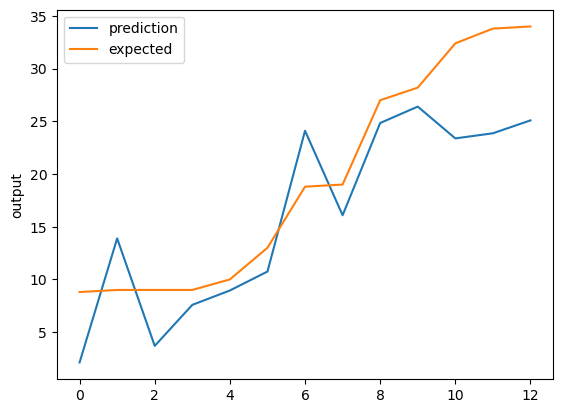

In [149]:
#linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(X.shape)
print("Coefficients: \n", model.coef_)
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: %.2f" % r2_score(y_test, y_pred))

chart_regression(y_pred, y_test)